## Importation des Bibliothèques  

L'importation des bibliotheques va permettre de :  

1. **numpy** : Effectuer des calculs mathématiques sur les données, comme la normalisation des valeurs pour que les modèles fonctionnent mieux.  

2. **pandas** : Charger le fichier CSV contenant les informations des patients et organiser ces données sous forme de tableau pour les analyser plus facilement.  

3. **matplotlib.pyplot** : Créer des graphiques pour mieux comprendre les tendances des données, par exemple en visualisant la répartition des cas bénins et malins.  

4. **seaborn** : Faire des graphiques plus détaillés, comme une carte de chaleur montrant quelles caractéristiques influencent le plus le diagnostic du cancer.  


In [36]:
import numpy as np  # Pour les opérations sur les tableaux
import matplotlib.pyplot as plt  # Pour la création de graphiques
import seaborn as sns  # Pour des visualisations statistiques avancées
import pandas as pd  # Pour la manipulation et l'analyse de données
import warnings
warnings.filterwarnings('ignore')

## Chargement des données  

### Pourquoi ?  
Le chargement des données permet d’importer le fichier `breast-cancer.csv`, qui contient des informations sur les patients atteints du cancer du sein.  

### Ce que contient le fichier :  
- **ID du patient** : Un identifiant unique.  
- **Diagnostic** : Indique si la tumeur est bénigne (`B`) ou maligne (`M`).  
- **Caractéristiques des cellules** : Plusieurs mesures (taille, texture, périmètre, etc.) permettant d’analyser la nature de la tumeur.  

### Objectif  
Charger ces données dans un **DataFrame** pour pouvoir les analyser, les nettoyer et les utiliser dans la suite du projet.  


In [57]:
# Chargement des données à partir d'un fichier CSV
df = pd.read_csv("breast-canser.csv") # Fichier contenant les données sur le cancer du sein

## Affichage des premières lignes du DataFrame  

### Pourquoi ?  
Cette étape permet d’obtenir un **aperçu rapide des données** en affichant les premières lignes du tableau. Cela aide à :  
- Vérifier la structure du jeu de données (colonnes, types de valeurs).  
- Identifier d’éventuelles valeurs manquantes ou incohérentes.  
- Comprendre les caractéristiques principales avant toute analyse approfondie.  



In [58]:
df.head()  # Affiche les 5 premières lignes du DataFrame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Prétraitement des données  

### Vérification des valeurs uniques dans la colonne `diagnosis`  

### Pourquoi ?  
Cette étape permet de **vérifier les différentes catégories** présentes dans la colonne `diagnosis`. Cela aide à :  
- S'assurer que seules deux classes existent (`B` pour bénin et `M` pour malin).  
- Détecter d’éventuelles erreurs ou valeurs inattendues.  
- Préparer les données pour l'étape de modélisation.  




In [59]:
df.diagnosis.unique() # Affiche les valeurs uniques de la colonne 'diagnosis'

array(['M', 'B'], dtype=object)

## Signification des valeurs dans la colonne `diagnosis`  

- **M → Maligne** : La tumeur est cancéreuse.  
- **B → Bénigne** : La tumeur n'est pas cancéreuse.  

Ces informations sont essentielles pour bien interpréter les résultats du modèle et analyser la distribution des diagnostics.  


## Statistiques descriptives des données  

### Pourquoi ?  
La commande `df.describe()` permet d'obtenir un **résumé statistique** des données numériques. Cela aide à :  
- Comprendre la distribution des valeurs pour chaque colonne.  
- Identifier d'éventuelles valeurs aberrantes.  
- Avoir une idée des tendances générales des données.  

### Informations affichées :  
- **count** : Nombre total de valeurs non nulles dans chaque colonne.  
- **mean** : Moyenne des valeurs.  
- **std** : Écart-type (dispersion des valeurs).  
- **min** : Valeur minimale.  
- **25% / 50% (médiane) / 75%** : Quartiles de la distribution des données.  
- **max** : Valeur maximale.  




In [60]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Informations générales sur le DataFrame  

### Pourquoi ?  
La commande `df.info()` permet d’obtenir un **résumé global** du jeu de données. Elle est utile pour :  
- Connaître le **nombre total de lignes et de colonnes**.  
- Vérifier les **types de données** de chaque colonne (numérique, texte, etc.).  
- Identifier la **présence de valeurs manquantes** dans les colonnes.  

### Informations affichées :  
- **Nombre total d’entrées (lignes)**.  
- **Noms des colonnes** et leur type (`int64`, `float64`, `object`...).  
- **Nombre de valeurs non nulles** dans chaque colonne.  
- **Mémoire utilisée** par le DataFrame.  




In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Comptage des valeurs manquantes dans chaque colonne  

### Pourquoi ?  
Cette étape permet d’identifier **les colonnes contenant des valeurs manquantes**. Cela aide à :  
- Déterminer si un **nettoyage des données** est nécessaire.  
- Prendre des décisions sur la gestion des valeurs manquantes (suppression, imputation…).  






In [62]:
df.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Visualisation des valeurs manquantes dans le DataFrame  

### Pourquoi ?  
Cette étape permet de **visualiser les valeurs manquantes** sous forme graphique afin de :  
- Identifier rapidement les colonnes concernées.  
- Voir la répartition des données manquantes.  
- Décider des actions à entreprendre (suppression, imputation…).  

### Outil utilisé  
La bibliothèque **seaborn** permet d’afficher un **diagramme des valeurs manquantes** avec `heatmap()`.  




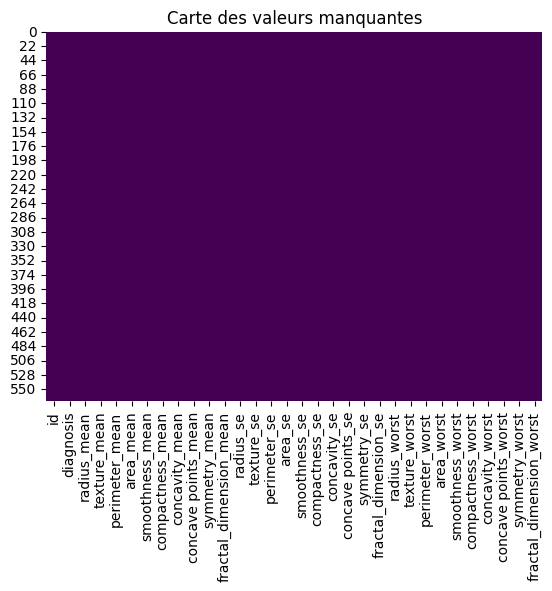

In [63]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

## Transformation de la variable cible `diagnosis` en valeurs numériques  

### Pourquoi ?  
Les modèles de machine learning fonctionnent avec des **valeurs numériques**. Comme la colonne `diagnosis` contient des **valeurs textuelles** (`M` pour maligne et `B` pour bénigne), il faut la convertir en **valeurs binaires** :  
- **M (Maligne) → 1**  
- **B (Bénigne) → 0**  

Cette transformation permet de rendre les données exploitables pour l'entraînement du modèle.  

In [64]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

## Vérification de la transformation  

### Pourquoi ?  
Après avoir converti les valeurs `M` et `B` en `1` et `0`, il est important de vérifier si la transformation a été appliquée correctement.  




In [65]:
df["diagnosis"].unique()

array([1, 0])

# 📊 Analyse Exploratoire de Données (EDA)

## 🎯 Objectif  
L’analyse exploratoire de données (**EDA - Exploratory Data Analysis**) permet de mieux comprendre les caractéristiques du jeu de données avant de l’utiliser pour l'entraînement d’un modèle. Cette étape est essentielle pour :  
- Identifier les tendances et les relations entre les variables.  
- Détecter les valeurs aberrantes et les éventuelles incohérences.  
- Vérifier la distribution des données pour un meilleur prétraitement.  




## Visualisation de la distribution de la variable Diagnosis

### Pourquoi ?

Avant de construire notre modèle de machine learning, il est important de comprendre la **répartition** des classes de la variable cible `diagnosis` (qui contient les valeurs "M" pour maligne et "B" pour bénigne). Cette distribution peut nous indiquer si les données sont **déséquilibrées** et, si c'est le cas, il pourrait être nécessaire d'appliquer des techniques de rééchantillonnage pour équilibrer les classes.




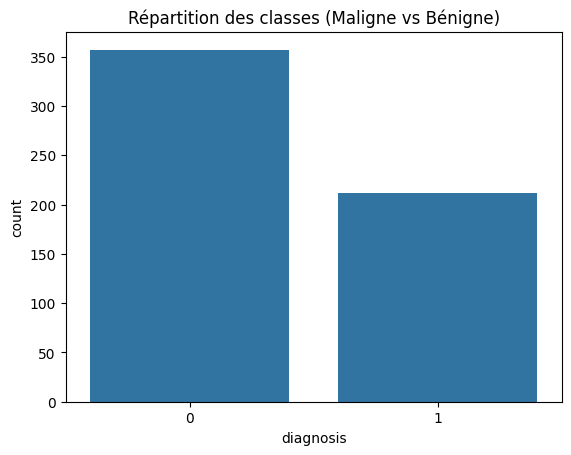

In [66]:
sns.countplot(x=df['diagnosis'])
plt.title("Répartition des classes (Maligne vs Bénigne)")
plt.show()

## Création d'histogrammes pour chaque caractéristique du DataFrame

### Pourquoi ?

Les histogrammes sont un excellent moyen de visualiser la **répartition** des valeurs pour chaque caractéristique (ou colonne) de notre DataFrame. Cela nous aide à comprendre la **distribution des données** (normalité, skewness, outliers, etc.) et à prendre des décisions informées pour le pré-traitement des données, comme la normalisation ou la gestion des valeurs aberrantes.

### Objectifs

1. Créer des histogrammes pour chaque colonne numérique du DataFrame.
2. Identifier les distributions des différentes caractéristiques.
3. Analyser la présence d'éventuelles anomalies, comme des valeurs extrêmes ou une distribution non uniforme.




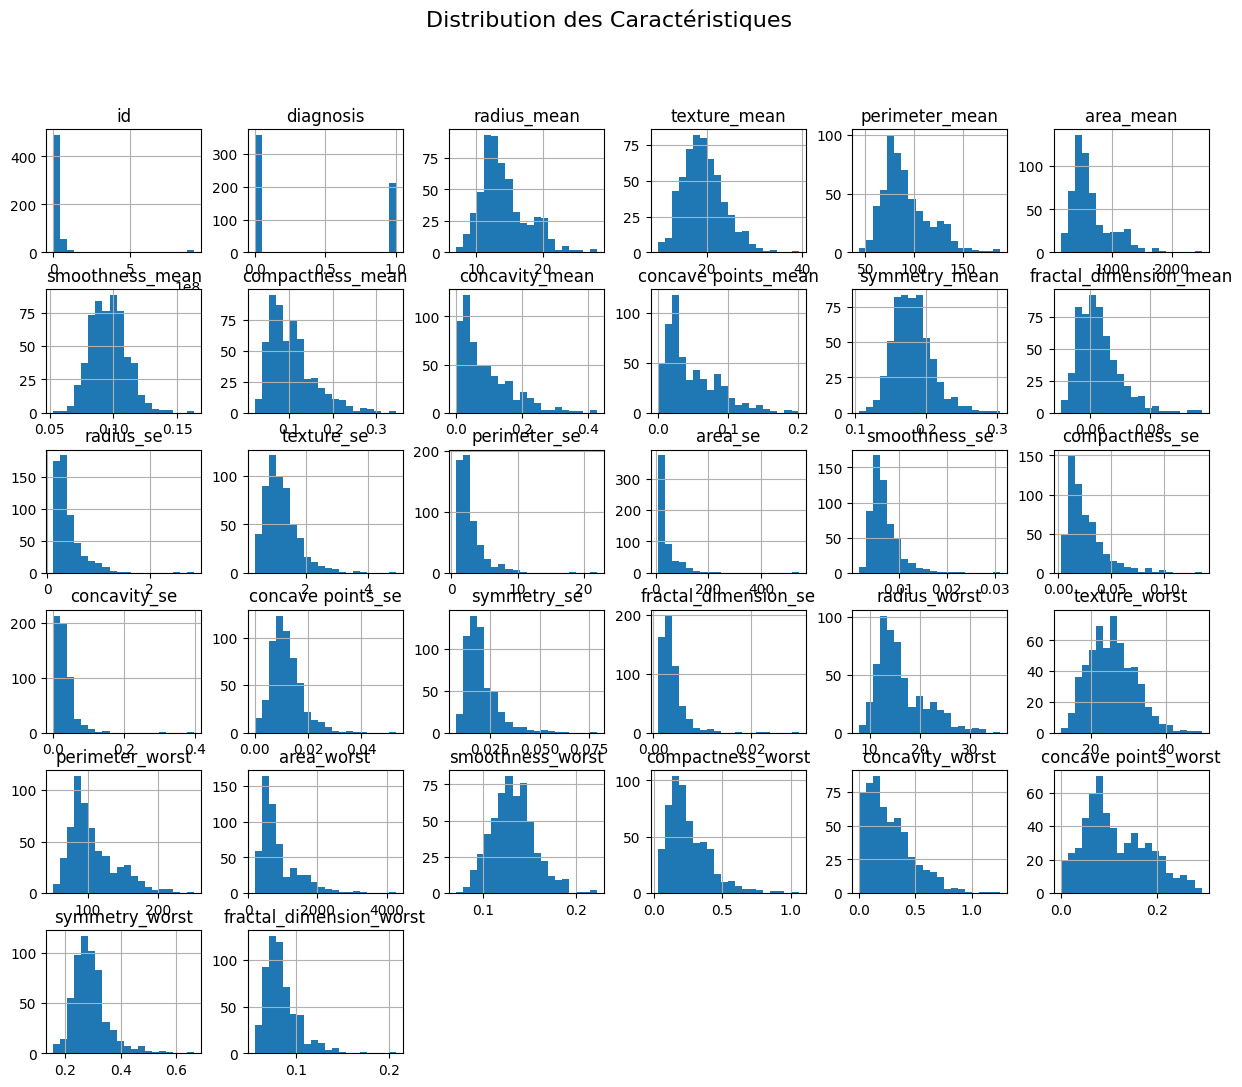

In [67]:
# figsize : définit la taille de la figure (largeur, hauteur) en pouces
# bins : définit le nombre de bacs (ou intervalles) dans l'histogramme
# color : définit la couleur des barres de l'histogramme
df.hist(figsize=(15, 12), bins=20, color="#1f77b4")

# Ajouter un titre principal à la figure
# fontsize : définit la taille de la police du titre
plt.suptitle("Distribution des Caractéristiques", fontsize=16)

# Afficher la figure avec les histogrammes
plt.show()

## Calcul de la matrice de corrélation

### Pourquoi ?

La **matrice de corrélation** permet d'explorer les **relations linéaires** entre les variables numériques d'un DataFrame. Chaque valeur de la matrice représente le **coefficient de corrélation de Pearson** entre deux variables. Cette analyse est utile pour comprendre comment les variables sont liées entre elles et pour identifier d'éventuelles **multicolinéarités** avant l'entraînement d'un modèle.

Les coefficients de corrélation varient entre :
- **1** : Corrélation parfaitement positive.
- **-1** : Corrélation parfaitement négative.
- **0** : Aucune corrélation linéaire.

### Objectifs

1. Calculer la **matrice de corrélation** entre toutes les variables numériques du DataFrame.
2. Visualiser la matrice à l'aide d'une carte de chaleur pour mieux comprendre les relations entre les variables.
3. Identifier les variables fortement corrélées qui pourraient nécessiter un traitement spécifique.






In [70]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


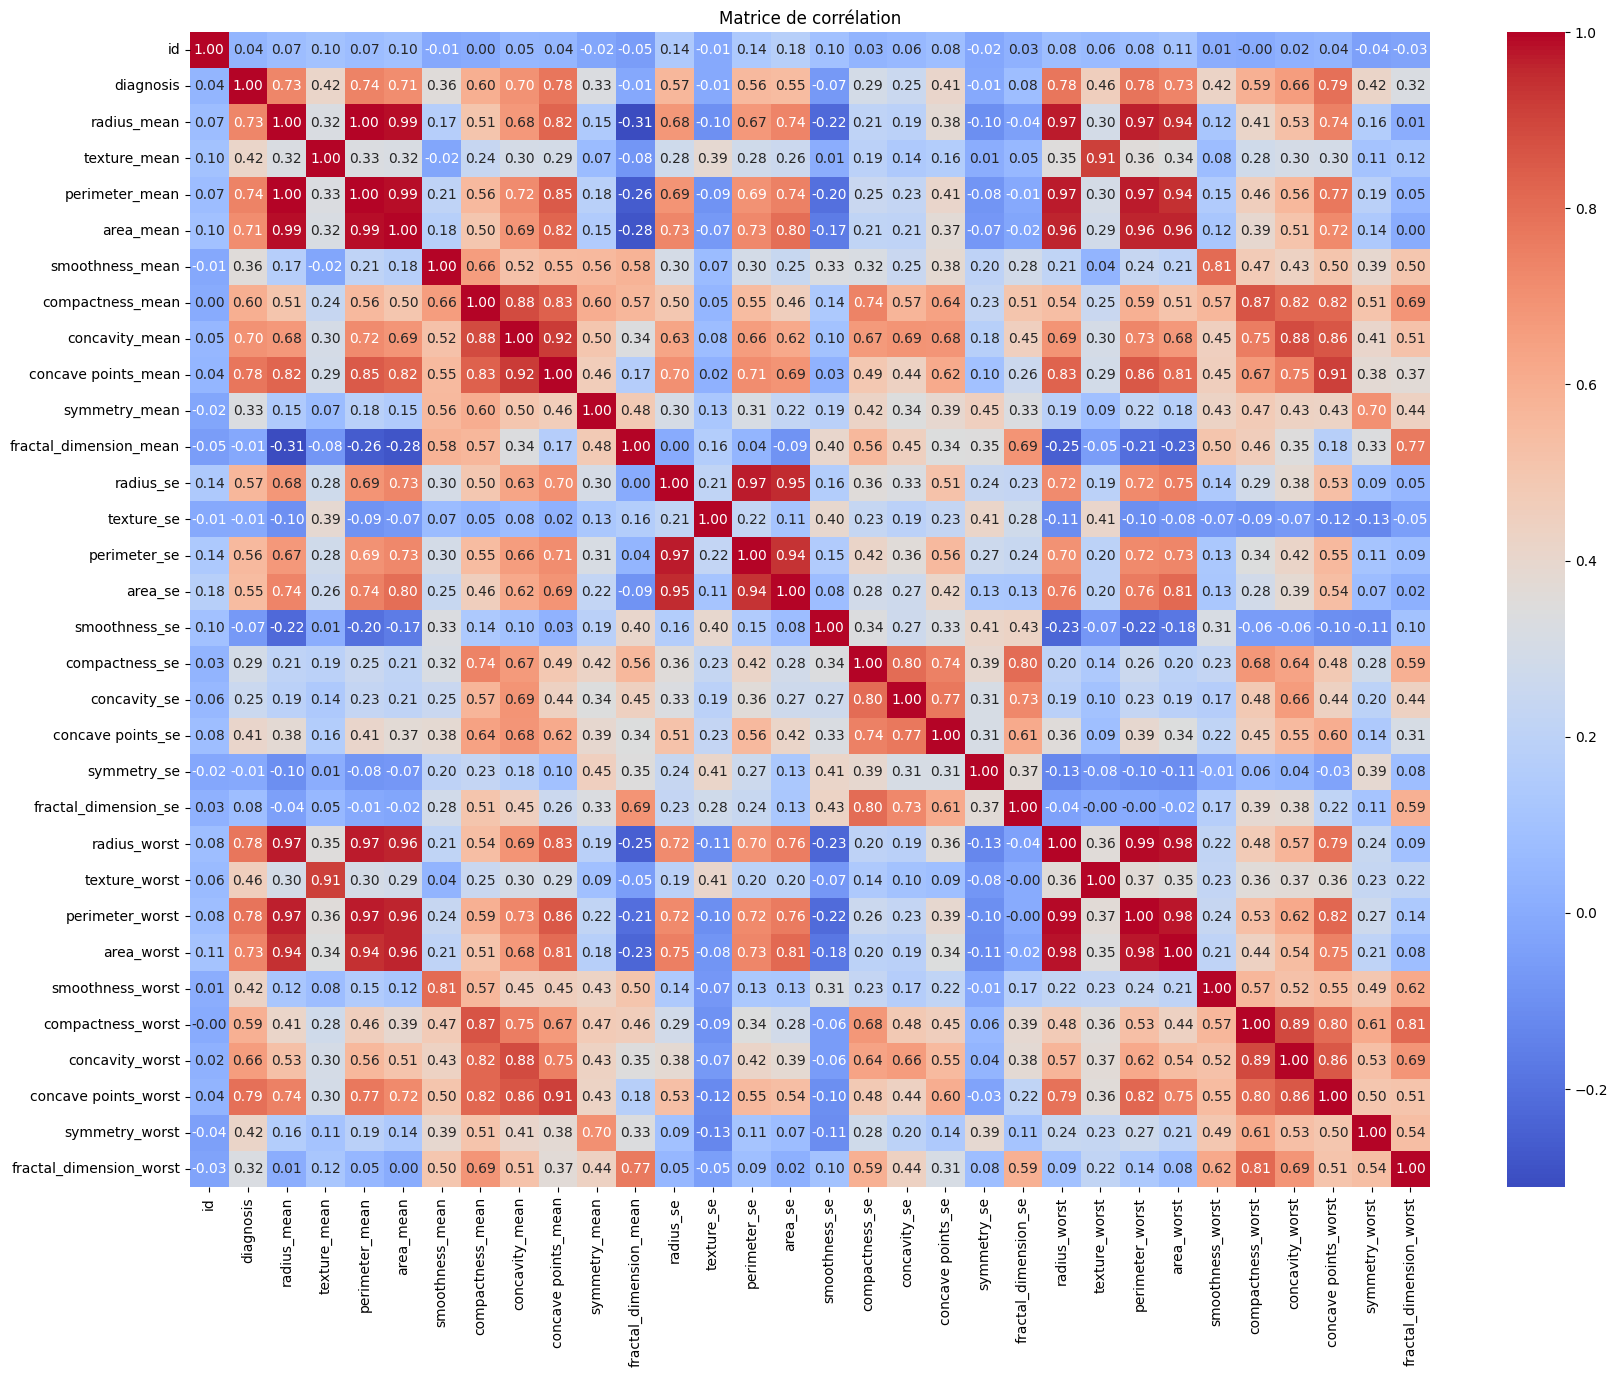

In [71]:
# La méthode corr() calcule la matrice de corrélation pour toutes les colonnes numériques du DataFrame.
corr_matrix = df.corr()

# Visualiser la matrice de corrélation
# Créer une figure avec une taille spécifique (largeur, hauteur) en pouces
plt.figure(figsize=(20, 15))

# Créer une carte de chaleur (heatmap) pour visualiser la matrice de corrélation
# annot : indique si les valeurs de corrélation doivent être affichées sur la carte
# fmt : format des annotations (ici, deux décimales)
# cmap : palette de couleurs utilisée pour la carte de chaleur
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Ajouter un titre à la carte de chaleur
plt.title('Matrice de corrélation')

# Afficher la carte de chaleur
plt.show()

## Sélection de caractéristiques pour le Pairplot

### Pourquoi ?

Le **pairplot** est un graphique qui affiche toutes les combinaisons possibles de paires de variables numériques, sous forme de nuages de points (scatter plots). Cela permet de visualiser les relations entre ces caractéristiques, d'identifier des patterns, et de repérer des tendances ou des corrélations. Cela est particulièrement utile pour l'exploration des données avant de construire un modèle.

En choisissant un sous-ensemble de caractéristiques pertinentes, nous pouvons mieux analyser les relations entre les variables sans être submergés par trop de données.

### Objectifs

1. Sélectionner un sous-ensemble de caractéristiques pertinentes du DataFrame.
2. Créer un **pairplot** pour visualiser les relations entre ces variables.
3. Identifier les **corrélations linéaires** et les **comportements similaires** entre les variables sélectionnées.

### Méthodologie

Nous allons :
1. Choisir un sous-ensemble de variables numériques pertinentes à analyser.
2. Créer un **pairplot** pour ces caractéristiques afin de visualiser leurs relations.




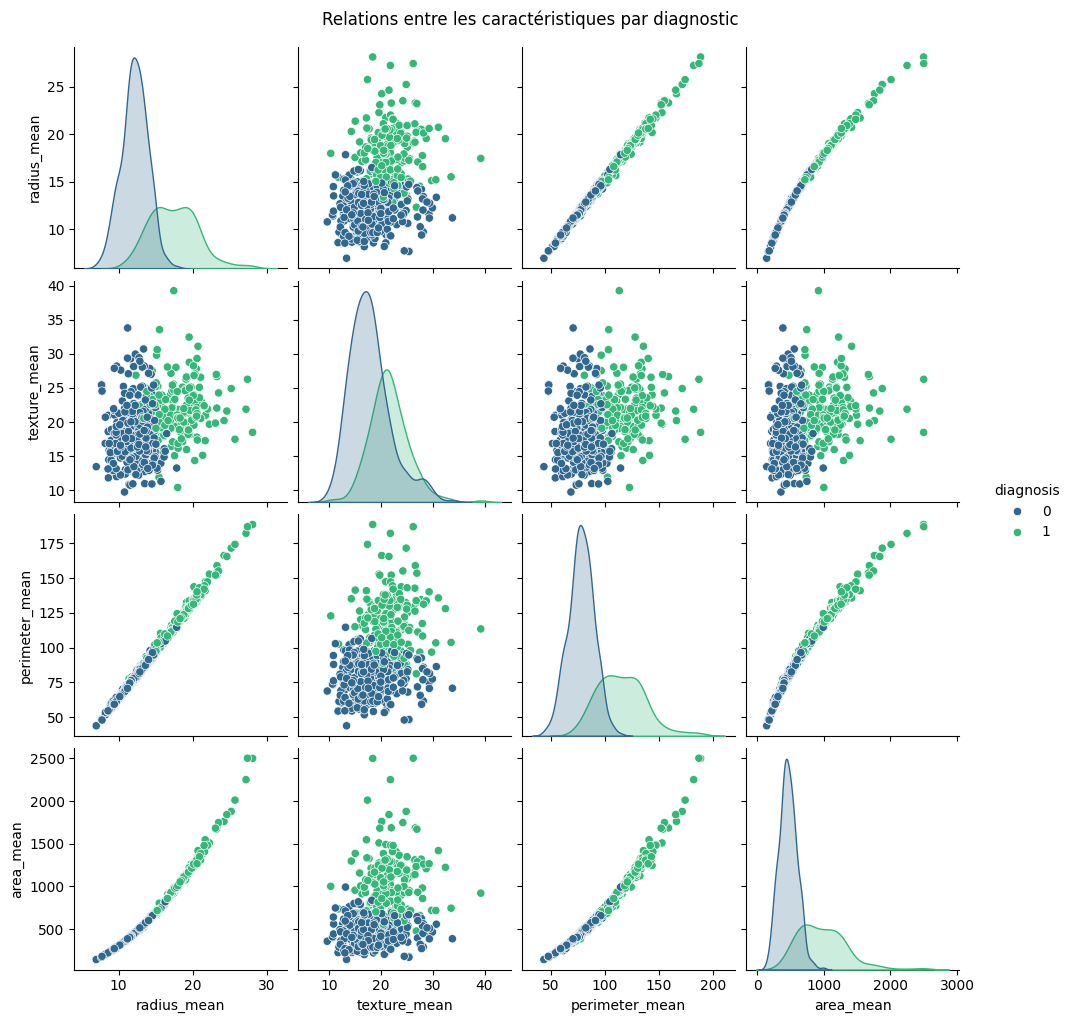

In [72]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Créer un pairplot pour visualiser les relations entre les caractéristiques
# 'hue' permet de colorer les points en fonction de la classe de diagnostic
# 'vars' spécifie les colonnes à inclure dans le pairplot
pairplot = sns.pairplot(df, hue='diagnosis', vars=features, palette='viridis')

# Ajouter un titre au graphique
plt.suptitle('Relations entre les caractéristiques par diagnostic', y=1.02)  # Ajuster la position du titre

# Afficher le graphique sans appel à plt.tight_layout()
plt.show()

## Créeation d'un Boxplot pour visualiser la distribution et les outliers des variables sélectionnées

### Pourquoi ?

Le **boxplot** (ou boîte à moustaches) est un excellent outil pour visualiser la **répartition des données** ainsi que les **outliers** (valeurs aberrantes). Il permet de résumer les caractéristiques essentielles de la distribution d'une variable (médiane, quartiles, minimum et maximum), et de repérer facilement les **valeurs extrêmes**.

### Objectifs

1. Créer un **boxplot** pour chaque variable sélectionnée afin de visualiser la distribution et détecter les outliers.
2. Observer la **dispersion** des données et la **symétrie** de chaque variable.
3. Identifier les **valeurs aberrantes** qui peuvent affecter l'analyse des données ou la performance des modèles.






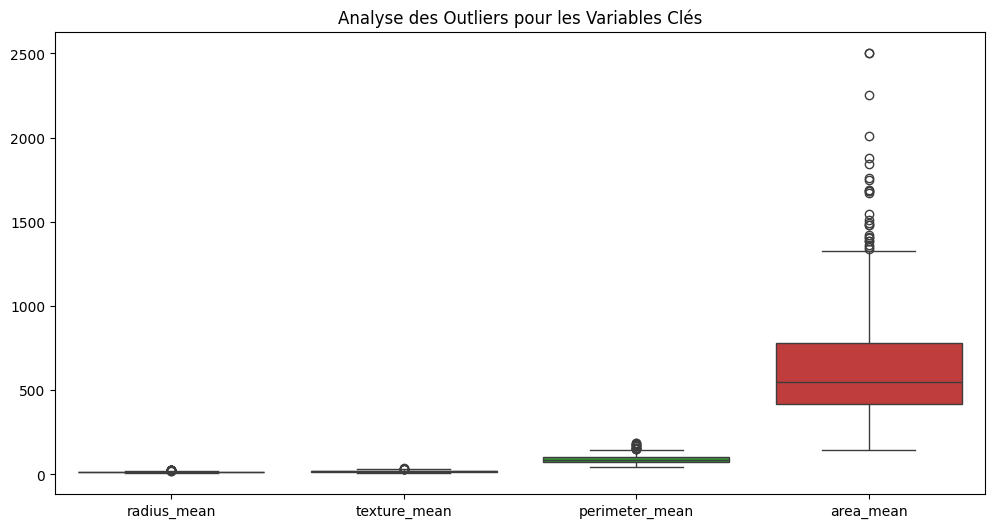

In [73]:
plt.figure(figsize=(12, 6))

# Sélectionner les variables clés pour le boxplot
variables_clefs = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

# Créer un boxplot pour visualiser la distribution et les outliers des variables sélectionnées
sns.boxplot(data=df[variables_clefs])

# Ajouter un titre au graphique
plt.title("Analyse des Outliers pour les Variables Clés")

# Afficher le graphique
plt.show()

## Sélection des Caractéristiques (Feature Selection)

### Pourquoi ?

La **sélection des caractéristiques** est une étape essentielle dans le processus de préparation des données pour la modélisation. Elle consiste à identifier et sélectionner les variables les plus pertinentes pour l'entraînement du modèle. Cela permet de :
- Réduire la **dimensionnalité** du jeu de données.
- Éviter le **surapprentissage** (overfitting) en supprimant les variables non pertinentes.
- Améliorer la **performance** et la **compréhension** du modèle.

Une bonne sélection des caractéristiques peut également réduire le temps d'entraînement et rendre le modèle plus interprétable.

### Objectifs

1. Identifier les variables les plus pertinentes pour la prédiction.
2. Sélectionner les caractéristiques qui apportent le plus d'information au modèle.
3. Éliminer les caractéristiques redondantes ou non significatives.





In [74]:
# Suppression de la colonne 'id' car elle n'est pas pertinente pour l'analyse
df.drop('id', axis=1, inplace=True)

## Calcule la Matrice de Corrélation Absolue

### Pourquoi ?

La **matrice de corrélation** est un outil statistique qui permet de mesurer la relation entre plusieurs variables numériques. Elle donne un aperçu des corrélations (positives ou négatives) entre les variables, ce qui est utile pour :
- Identifier les **relations linéaires** entre les variables.
- Décider quelles variables peuvent être **éliminées** si elles sont fortement corrélées.
- Comprendre comment les différentes caractéristiques interagissent dans le modèle.

Calculer la **matrice de corrélation absolue** permet de se concentrer sur la **force** des relations entre les variables, sans tenir compte de la direction (positive ou négative).








In [75]:
#Calculer la matrice de corrélation absolue
corr_matrix = df.corr().abs()

# Créer un masque pour la partie supérieure de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Appliquer le masque à la matrice de corrélation pour ne garder que la partie inférieure
tri_df = corr_matrix.mask(mask)

# Identifier les colonnes à supprimer : celles ayant une corrélation supérieure à 0.92
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Supprimer les colonnes identifiées du DataFrame
df = df.drop(to_drop, axis=1)

# Afficher le nombre de caractéristiques restantes dans le DataFrame
print(df.shape[1])

23


In [76]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

## Séparation des Caractéristiques et de la Cible

### Pourquoi ?

Dans le cadre de l'entraînement d'un modèle de machine learning, il est essentiel de **séparer les caractéristiques** (features) de la **cible** (target) pour pouvoir entraîner le modèle sur les **entrées** et évaluer ses performances sur les **prédictions**. Cette séparation permet également de mieux comprendre la structure des données et de préparer le modèle de manière adéquate.

### Caractéristiques (`X`) :
Les caractéristiques sont les **entrées** du modèle. Elles représentent les variables d'entrée sur lesquelles le modèle va apprendre.

### Cible (`y`) :
La cible est la **variable à prédire** ou la **sortie**. C'est le résultat que nous cherchons à prédire ou à classer en fonction des caractéristiques.

### Objectifs

1. Séparer les variables indépendantes (**caractéristiques**) de la variable dépendante (**cible**).
2. Préparer les données pour l'entraînement du modèle.





In [78]:
# X contient toutes les caractéristiques du DataFrame, sauf la colonne 'diagnosis'
X = df.drop('diagnosis', axis=1)

# y contient la variable cible, qui est le diagnostic (benin ou malin)
y = df['diagnosis']

## Division des Données en Ensembles d'Entraînement et de Test

### Pourquoi ?

Dans le cadre de la construction d'un modèle de machine learning, il est important de **diviser les données** en deux ensembles distincts :
1. **Ensemble d'entraînement** : utilisé pour entraîner le modèle.
2. **Ensemble de test** : utilisé pour évaluer la performance du modèle sur de nouvelles données, non vues lors de l'entraînement.

Cette séparation permet de **vérifier la capacité de généralisation** du modèle et d'éviter le **surapprentissage** (overfitting), où le modèle apprend trop bien les détails de l'ensemble d'entraînement, mais échoue sur des données nouvelles.

### Objectifs

1. Diviser les données en deux ensembles : **Entraînement** (train) et **Test** (test).
2. S'assurer que l'ensemble de test est **indépendant** de l'ensemble d'entraînement.
3. Utiliser les données d'entraînement pour ajuster le modèle et les données de test pour **évaluer sa performance**.

### Méthodologie

Nous allons utiliser la fonction **train_test_split** de la bibliothèque **scikit-learn** pour diviser le jeu de données en ensembles d'entraînement et de test. Il est courant de réserver **70-80% des données pour l'entraînement** et **20-30% pour le test**.



In [79]:
from sklearn.model_selection import train_test_split
#Division des Données en Ensembles d'Entraînement et de Test
# X_train et y_train contiendront respectivement les caractéristiques et la cible pour l'entraînement
# X_test et y_test contiendront respectivement les caractéristiques et la cible pour le test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

## Standardisation des Données

### Pourquoi la Standardisation est-elle Importante ?

La **standardisation** est une étape essentielle dans le prétraitement des données, particulièrement pour les modèles de machine learning qui sont sensibles à l'échelle des caractéristiques. Cela consiste à mettre à l'échelle les **caractéristiques** (features) de manière à ce qu'elles aient toutes des **moyennes égales à 0** et des **écarts-types égaux à 1**. 

### Objectifs de la Standardisation :
1. **Éviter l'influence disproportionnée** des caractéristiques ayant des échelles très différentes.
2. Assurer que le modèle traite toutes les caractéristiques de manière équivalente.
3. Améliorer la performance et la convergence des algorithmes de machine learning (notamment ceux qui utilisent des distances comme KNN, SVM, ou les réseaux de neurones).



In [80]:
#Scalping
from sklearn.preprocessing import StandardScaler
# Créer un objet StandardScaler
scaler = StandardScaler()

In [81]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [82]:
X_train.shape

(455, 22)

## Entraînement et sélection du meilleur modèle

#### Description de l'étape
Dans cette étape, vous avez entraîné votre jeu de données sur quatre modèles de machine learning :

1. Régression logistique : Un modèle linéaire simple, idéal pour les problèmes de classification.
2. SVM (Support Vector Machine) : Un modèle puissant pour la classification, capable de gérer des frontières de décision complexes grâce à l'utilisation de noyaux (kernels).
3. Random Forest : Un modèle ensembliste basé sur les arbres de décision, qui combine plusieurs arbres pour améliorer la précision et réduire le surajustement.
4. Decision Tree : Un modèle simple et interprétable, qui divise les données en fonction de règles décisionnelles.
L'objectif est de comparer leurs performances afin de sélectionner le modèle qui offre les meilleurs résultats pour votre problème.

#### Importance de cette étape
1. Identifier le modèle optimal : Tous les modèles ne se comportent pas de la même manière sur un jeu de données donné. Cette étape permet de déterminer lequel est le plus performant.
2. Adapter le modèle aux données : Certains modèles sont mieux adaptés à des données linéaires, tandis que d'autres excellent sur des données non linéaires ou complexes.
3. Éviter le surajustement (overfitting) : En testant plusieurs modèles, vous pouvez identifier ceux qui généralisent bien sur des données non vues, plutôt que de simplement mémoriser les données d'entraînement.
4. Optimiser les ressources : Choisir le meilleur modèle permet de gagner du temps et des ressources lors du déploiement et de la maintenance.
5. Comprendre les données : La performance relative des modèles peut fournir des insights sur la nature des données (par exemple, si un modèle non linéaire performe mieux, cela suggère que les données ont une structure complexe).

#### Difficultés ou défis
1. Choix des métriques : Il est essentiel de choisir les bonnes métriques d'évaluation (précision, rappel, F1-score, AUC-ROC, etc.) en fonction du problème (classification binaire, multiclasse, déséquilibre des classes, etc.).
2. Temps de calcul : Certains modèles, comme les SVM ou les Random Forests, peuvent être coûteux en termes de temps et de ressources, surtout sur de grands jeux de données.
3. Surajustement (overfitting) : Des modèles complexes comme les arbres de décision ou les Random Forests peuvent surajuster les données d'entraînement, ce qui nuit à leur performance sur des données non vues.
4. Interprétabilité : Certains modèles, comme les Random Forests ou les SVM, sont moins interprétables que des modèles simples comme la régression logistique ou les arbres de décision.


In [83]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='lbfgs', max_iter=300)
model.fit(X_train_s,y_train)

LogisticRegression(max_iter=300)

In [84]:
y_pred = model.predict(X_test_s)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,model.predict(X_train_s)))
reg_acc=accuracy_score(y_test,model.predict(X_test_s))
print(reg_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Explication détaillée de nos modèles et de l'utilisation de GridSearchCV

Nous avons implémenté quatre modèles de machine learning (**KNN**, **SVM**, **Decision Tree** et **Random Forest**) en utilisant **GridSearchCV** pour optimiser leurs hyperparamètres. Voici une explication détaillée de chaque modèle et de l'utilité de GridSearchCV dans notre code :

---

### 1. **K-Nearest Neighbors (KNN)**

#### Ce que nous avons fait :
- Nous avons défini un modèle **KNeighborsClassifier**.
- Nous avons utilisé **GridSearchCV** pour explorer une grille d'hyperparamètres, notamment :
  - **`n_neighbors`** : Nombre de voisins à considérer.
  - **`weights`** : Pondération des voisins (`uniform` ou `distance`).
  - **`metric`** : Mesure de distance (`euclidean`, `manhattan`, `minkowski`).
  - **`algorithm`** : Algorithme de calcul des voisins (`auto`, `ball_tree`, `kd_tree`, `brute`).
  - **`leaf_size`** : Taille des feuilles pour les arbres `ball_tree` ou `kd_tree`.

#### Pourquoi avons-nous utilisé GridSearchCV pour KNN ?
KNN est très sensible au choix de `n_neighbors` et de la métrique de distance. **GridSearchCV** nous a permis de trouver la meilleure combinaison de ces hyperparamètres pour maximiser la précision du modèle. Après avoir identifié les meilleurs hyperparamètres, nous avons entraîné un modèle optimisé et évalué sa performance sur l'ensemble de test.

---

### 2. **Support Vector Machine (SVM)**

#### Ce que nous avons fait :
- Nous avons défini un modèle **SVC** (Support Vector Classifier).
- Nous avons utilisé **GridSearchCV** pour explorer une grille d'hyperparamètres, notamment :
  - **`C`** : Paramètre de régularisation.
  - **`gamma`** : Paramètre du noyau (surtout pour `rbf`).
  - **`kernel`** : Fonction de noyau (`linear`, `poly`, `rbf`, `sigmoid`).

#### Pourquoi avons-nous utilisé GridSearchCV pour SVM ?
SVM est un modèle puissant, mais ses performances dépendent fortement des hyperparamètres comme `C`, `gamma` et `kernel`. **GridSearchCV** nous a aidés à trouver la configuration optimale pour maximiser la séparation des classes. Après avoir identifié les meilleurs hyperparamètres, nous avons évalué le modèle sur l'ensemble de test.

---

### 3. **Decision Tree**

#### Ce que nous avons fait :
- Nous avons défini un modèle **DecisionTreeClassifier**.
- Nous avons utilisé **GridSearchCV** pour explorer une grille d'hyperparamètres, notamment :
  - **`criterion`** : Critère de division (`gini` ou `entropy`).
  - **`max_depth`** : Profondeur maximale de l'arbre.
  - **`min_samples_split`** : Nombre minimal d'échantillons requis pour diviser un nœud.
  - **`min_samples_leaf`** : Nombre minimal d'échantillons requis pour être une feuille.

#### Pourquoi avons-nous utilisé GridSearchCV pour Decision Tree ?
Les arbres de décision ont tendance à surajuster si leurs hyperparamètres ne sont pas bien réglés. **GridSearchCV** nous a aidés à trouver une configuration qui équilibre la complexité et la performance. Après avoir identifié les meilleurs hyperparamètres, nous avons évalué le modèle sur l'ensemble de test.

---

### 4. **Random Forest**

#### Ce que nous avons fait :
- Nous avons défini un modèle **RandomForestClassifier**.
- Nous avons utilisé **GridSearchCV** pour explorer une grille d'hyperparamètres, notamment :
  - **`n_estimators`** : Nombre d'arbres dans la forêt.
  - **`criterion`** : Critère de division (`gini` ou `entropy`).
  - **`max_depth`** : Profondeur maximale des arbres.
  - **`min_samples_split`** : Nombre minimal d'échantillons requis pour diviser un nœud.
  - **`min_samples_leaf`** : Nombre minimal d'échantillons requis pour être une feuille.

#### Pourquoi avons-nous utilisé GridSearchCV pour Random Forest ?
Random Forest est un modèle robuste, mais ses performances dépendent de la configuration des hyperparamètres. **GridSearchCV** nous a permis de trouver le bon équilibre entre complexité et généralisation. Après avoir identifié les meilleurs hyperparamètres, nous avons évalué le modèle sur l'ensemble de test.

---

### En résumé :
- **KNN** : Nous avons optimisé `n_neighbors`, `weights`, `metric`, `algorithm` et `leaf_size` pour améliorer la précision des prédictions.
- **SVM** : Nous avons recherché les meilleurs `C`, `gamma` et `kernel` pour maximiser la séparation des classes.
- **Decision Tree** : Nous avons ajusté `criterion`, `max_depth`, `min_samples_split` et `min_samples_leaf` pour éviter le surajustement.
- **Random Forest** : Nous avons optimisé `n_estimators`, `criterion`, `max_depth`, `min_samples_split` et `min_samples_leaf` pour équilibrer stabilité et performance.

En utilisant **GridSearchCV**, nous avons systématiquement exploré ces hyperparamètres pour chaque modèle, garantissant ainsi des performances optimales et une meilleure généralisation. Cela nous a permis de construire des modèles robustes, prêts pour le déploiement.





### 1. **K-Nearest Neighbors (KNN)**

In [96]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Définir le modèle
model_knn = KNeighborsClassifier()

# Définir la grille des hyperparamètres
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

# Configurer la recherche en grille
grid_search = GridSearchCV(model_knn, param_grid, cv=5)

# Exécuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

Meilleurs hyperparamètres : {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [97]:
# Supposons que 'grid_search' soit l'objet GridSearchCV déjà ajusté
best_params = grid_search.best_params_

# Créer un nouveau modèle KNeighborsClassifier avec les meilleurs hyperparamètres
model_knn_optimized = KNeighborsClassifier(**best_params)

# Entraîner le modèle optimisé sur l'ensemble de données d'entraînement complet
model_knn_optimized.fit(X_train_s, y_train)

# Évaluer le modèle optimisé sur l'ensemble de test
accuracy_knn = model_knn_optimized.score(X_test_s, y_test)
print("Précision du modèle optimisé :", accuracy_knn)

Précision du modèle optimisé : 0.9736842105263158


### 2. **Support Vector Machine (SVM)**

In [88]:
#svc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Définir le modèle
model_svm = SVC(probability=True)

# Définir la grille des hyperparamètres
param_grid = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20],
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Configurer la recherche en grille avec parallélisation
grid_search = GridSearchCV(model_svm, param_grid, cv=5, n_jobs=-1)

# Exécuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparamètres et score en validation croisée
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Score moyen en validation croisée :", grid_search.best_score_)

# Évaluer le modèle avec les meilleurs hyperparamètres sur les données de test
best_model_svm = grid_search.best_estimator_
y_pred = best_model_svm.predict(X_test_s)
model_svm_acc=accuracy_score(y_test, y_pred)
print("Accuracy sur le test set :", accuracy_score(y_test, y_pred))


Meilleurs hyperparamètres : {'C': 15, 'gamma': 0.01}
Score moyen en validation croisée : 0.9802197802197803
Accuracy sur le test set : 0.9824561403508771


In [89]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

### 3. **Decision Tree**

In [ ]:
#DT
from sklearn.tree import DecisionTreeClassifier

# Définir le modèle
model_dt = DecisionTreeClassifier()

# Définir la grille des hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Configurer la recherche en grille avec validation croisée
grid_search = GridSearchCV(model_dt, param_grid, cv=5, n_jobs=-1)

# Exécuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparamètres et score moyen
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Score moyen en validation croisée :", grid_search.best_score_)

# Évaluer le modèle sur les données de test
best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(X_test_s)
model_dt_acc=accuracy_score(y_test, y_pred)
print("Accuracy sur le test set :", accuracy_score(y_test, y_pred))

Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Score moyen en validation croisée : 0.9340659340659341
Accuracy sur le test set : 0.9649122807017544


### 4. **Random Forest**

In [93]:
#RFC
from sklearn.ensemble import RandomForestClassifier


# Définir le modèle
model_rf = RandomForestClassifier()

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'criterion': ['gini', 'entropy'],  # Mesure d'impureté
    'max_depth': [None, 10, 20, 50],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 5]  # Nombre min d'échantillons dans une feuille
}

# Configurer la recherche en grille avec validation croisée
grid_search = GridSearchCV(model_rf, param_grid, cv=5, n_jobs=-1)

# Exécuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparamètres et score moyen
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Score moyen en validation croisée :", grid_search.best_score_)

# Évaluer le modèle sur les données de test
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test_s)
model_rf_acc=accuracy_score(y_test, y_pred)
print("Accuracy sur le test set :", accuracy_score(y_test, y_pred))

Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Score moyen en validation croisée : 0.9714285714285715
Accuracy sur le test set : 0.9736842105263158


### Comparaison des performances des modèles

In [98]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(reg_acc,4), 100*round(accuracy_knn,4), 100*round(model_svm_acc,4), 100*round(model_dt_acc,4), 100*round(model_rf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,98.25
4,Random Forest Classifier,97.37
1,KNN,97.37
0,Logistic Regression,96.49
3,Decision Tree Classifier,96.49


## Évaluation des Modèles avec la Courbe ROC

L'évaluation des modèles de classification peut être réalisée à l'aide de la **courbe ROC** (Receiver Operating Characteristic), qui permet d'analyser la performance des différents modèles en termes de deux métriques essentielles :

- **Sensibilité** (Taux de Vrais Positifs) : La proportion des instances positives correctement identifiées par le modèle.
- **Spécificité** (Taux de Faux Positifs) : La proportion des instances négatives correctement identifiées par le modèle.

### Processus

1. **Calcul de la courbe ROC** : 
   Pour chaque modèle, nous traçons la courbe ROC en calculant la **taux de faux positifs** (FPR) et le **taux de vrais positifs** (TPR) à différents seuils de classification.

2. **Calcul de l'Aire sous la Courbe (AUC)** :
   L'AUC (Area Under the Curve) mesure la qualité globale du modèle. Un AUC proche de 1 signifie un modèle performant, tandis qu'un AUC proche de 0.5 indique un modèle aléatoire.

3. **Comparaison des modèles** : 
   Plusieurs modèles peuvent être comparés sur la même courbe ROC. Le modèle qui montre une plus grande distance entre la courbe et la ligne de référence (diagonale rouge) sera considéré comme meilleur.

### Objectif

L'objectif de cette étape est de visualiser et de comparer les performances des différents modèles (par exemple : **Régression Logistique**, **Arbre de Décision**, **SVM**, **KNN**, **Forêt Aléatoire**) pour déterminer celui qui offre le meilleur compromis entre **sensibilité** et **spécificité**.




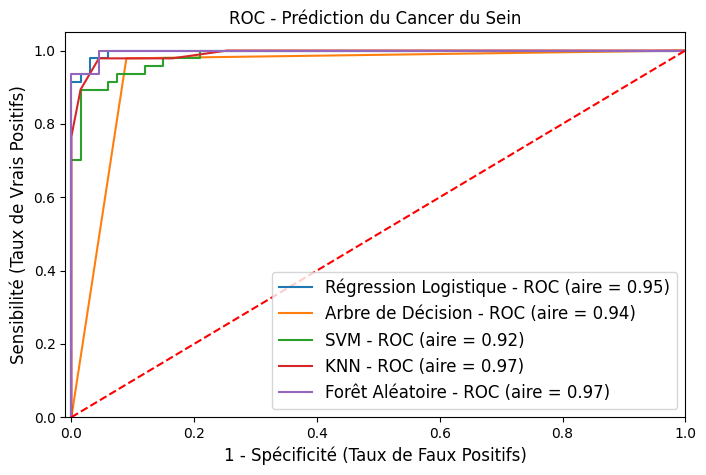

In [99]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(8,5))

models = [
    {
        'label': 'Régression Logistique',
        'model': model,
    },
    {
        'label': 'Arbre de Décision',
        'model': model_dt,
    },
    {
        'label': 'SVM',
        'model': model_svm,
    },
    {
        'label': 'KNN',
        'model': model_knn,
    },
    {
        'label': 'Forêt Aléatoire',
        'model': model_rf,
    },
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcul de la courbe ROC
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    
    # Tracé de la courbe ROC
    plt.plot(fpr1, tpr1, label='%s - ROC (aire = %0.2f)' % (m['label'], auc))

# Ligne de référence
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Spécificité (Taux de Faux Positifs)', fontsize=12)
plt.ylabel('Sensibilité (Taux de Vrais Positifs)', fontsize=12)
plt.title('ROC - Prédiction du Cancer du Sein', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Affichage du graphe
plt.show()


## Évaluation des modèles à l'aide de la précision et de l'AUC-ROC

Dans cette étape, nous comparons plusieurs modèles de machine learning en utilisant deux métriques essentielles :

### 1. **Précision (Accuracy)**
La précision mesure le pourcentage de prédictions correctes réalisées par un modèle. Elle est définie comme le rapport du nombre de prédictions correctes sur le nombre total de prédictions. C'est une métrique simple mais puissante pour évaluer l'efficacité d'un modèle.

### 2. **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
L'AUC-ROC est une métrique utilisée pour évaluer la capacité d'un modèle à distinguer entre les classes positives et négatives. 
- **ROC (Receiver Operating Characteristic)** est une courbe qui trace le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité).
- **AUC** (Area Under the Curve) représente l'aire sous cette courbe. Une AUC de 1 signifie un modèle parfait, tandis qu'une AUC de 0,5 indique un modèle sans pouvoir discriminant.

### Objectif
Cette étape consiste à entraîner plusieurs modèles (Régression Logistique, Arbre de Décision, SVM, KNN, Forêt Aléatoire) et à évaluer leur performance sur un ensemble de test. Nous calculons la précision et l'AUC-ROC de chaque modèle, puis nous comparons les résultats à l'aide d'un graphique.

### Résultats
Les résultats sont présentés sous forme de barres représentant la précision (accuracy) et l'AUC-ROC des différents modèles. Cela nous permet d'identifier le modèle le plus performant pour la tâche de prédiction.




Précision des modèles : [96.49, 96.49, 98.25, 97.37, 97.37]
Scores ROC des modèles : [np.float64(99.63), np.float64(92.97), np.float64(98.41), np.float64(99.21), np.float64(99.9)]


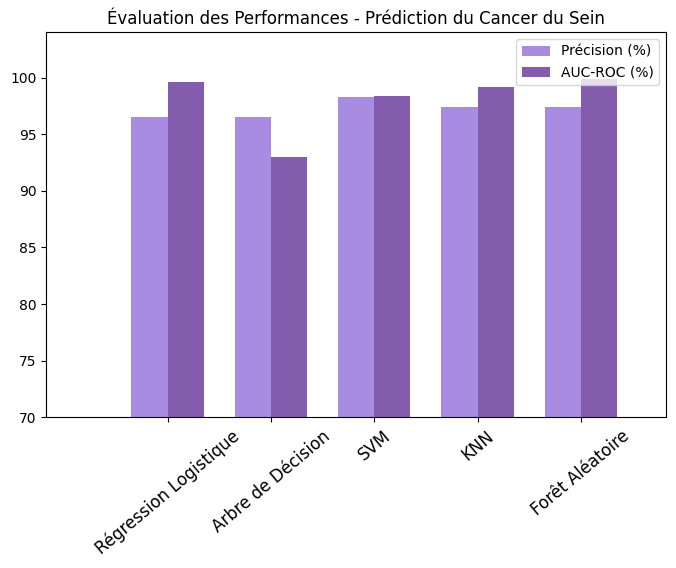

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Liste des modèles (Assurez-vous qu'ils sont bien définis)
models = [
    {'label': 'Régression Logistique', 'model': model},
    {'label': 'Arbre de Décision', 'model': model_dt},
    {'label': 'SVM', 'model': model_svm},
    {'label': 'KNN', 'model': model_knn},
    {'label': 'Forêt Aléatoire', 'model': model_rf},
]

# Liste des précisions (accuracy)
means_accuracy = [
    100 * round(reg_acc, 4),
    100 * round(model_dt_acc, 4),
    100 * round(model_svm_acc, 4),
    100 * round(accuracy_knn, 4),
    100 * round(model_rf_acc, 4),
]

# Calcul des scores AUC-ROC
means_roc = []
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Vérifier si le modèle supporte predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = metrics.roc_auc_score(y_test, y_prob)
    else:
        auc = metrics.roc_auc_score(y_test, y_pred)  # Pour les modèles sans `predict_proba`

    means_roc.append(100 * round(auc, 4))

# Affichage des résultats
print("Précision des modèles :", means_accuracy)
print("Scores ROC des modèles :", means_roc)

# Création du graphique comparatif
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots(figsize=(8, 5))

# Barres pour l'accuracy
rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Précision (%)')

# Barres pour le score AUC-ROC
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='AUC-ROC (%)')

plt.xlim([-1, n_groups])
plt.ylim([70, 104])

plt.title('Évaluation des Performances - Prédiction du Cancer du Sein', fontsize=12)
plt.xticks(index + bar_width / 2, [m['label'] for m in models], rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

# Affichage du graphique
plt.show()


In [ ]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(model_svm, 'modell_svm.pkl')

['scaler.pkl']